In [1]:
# my own cheat sheet for all-things-keras

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
# import and organize data

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [1]:
# verify data shape and type

print(X_train.shape)
print(X_train.dtype)

NameError: name 'X_train' is not defined

In [4]:
# scale the data if needed

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. # example of scaling images down

In [5]:
# initializing

init = tf.keras.initializers.RandomNormal(mean=0, stddev=1.)

https://keras.io/api/layers/initializers/

In [6]:
# modeling using Sequenial API

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

https://keras.io/guides/sequential_model/

In [7]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 24790 (96.84 KB)
Trainable params: 24790 (96.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# model compiling

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

see https://keras.io/losses, https://keras.io/optimizers, and https://keras.io/metrics.

In [9]:
# training the model

history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 468us/step - loss: 0.9129 - accuracy: 0.6893 - val_loss: 0.6172 - val_accuracy: 0.7652
Epoch 2/30
1719/1719 [==============================] - 1s 456us/step - loss: 0.5513 - accuracy: 0.8080 - val_loss: 0.5296 - val_accuracy: 0.8060
Epoch 3/30
1719/1719 [==============================] - 1s 420us/step - loss: 0.4957 - accuracy: 0.8264 - val_loss: 0.4823 - val_accuracy: 0.8302
Epoch 4/30
1719/1719 [==============================] - 1s 421us/step - loss: 0.4644 - accuracy: 0.8359 - val_loss: 0.4867 - val_accuracy: 0.8264
Epoch 5/30
1719/1719 [==============================] - 1s 421us/step - loss: 0.4439 - accuracy: 0.8434 - val_loss: 0.4230 - val_accuracy: 0.8452
Epoch 6/30
1719/1719 [==============================] - 1s 436us/step - loss: 0.4273 - accuracy: 0.8491 - val_loss: 0.4078 - val_accuracy: 0.8474
Epoch 7/30
1719/1719 [==============================] - 1s 421us/step - loss: 0.4155 - accuracy: 0.8529 - val_loss: 0.4201 -

https://keras.io/guides/training_with_built_in_methods/

In [10]:
history.history # holds a record of the metrics during training
history.epoch   # list of completed epochs
history.params  # shows training parameters

{'verbose': 1, 'epochs': 30, 'steps': 1719}

<Axes: xlabel='Epoch'>

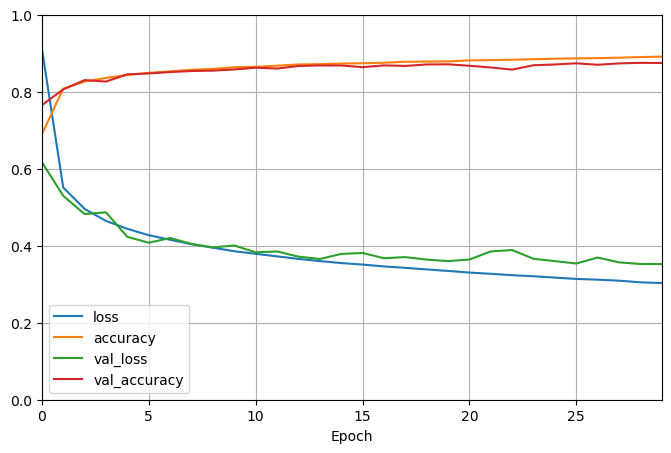

In [11]:
# graphing training

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
)